# 第4章: 形態素解析

In [1]:
import re
import MeCab

In [2]:
mecab = MeCab.Tagger()
with open("../data/neko.txt") as fr,\
     open("../data/neko.txt.mecab", "w") as fw:
    neko_mecab = mecab.parse(fr.read())
    print(neko_mecab, file=fw)

## 30. 形態素解析結果の読み込み
形態素解析結果の見方: `表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音`
(https://qiita.com/hasoya/items/0561bb1481a648aa8e6e)

In [3]:
def map_morph_info(text, delimiters='[\t,]'):
    text = re.split(delimiters, text)
    
    return {
        'surface': text[0],
        'base': text[-3],
        'pos': text[1],
        'pos1': text[2]
    }

In [4]:
neko_morphs = []
with open("../data/neko.txt.mecab") as fr:
    sentence_morphs = []
    for i, line in enumerate(fr):
        try:
            morph_map = map_morph_info(line.rstrip())
        except:
            print(line.rstrip())
        sentence_morphs.append(morph_map)
        if (morph_map['surface']=='。') and (morph_map['pos1']=='句点'):
            neko_morphs.append(sentence_morphs)
            sentence_morphs = []

EOS



## 31. 動詞

In [5]:
import itertools

In [6]:
neko_morphs_flatten = list(itertools.chain.from_iterable(neko_morphs))
verb_surfaces = [
    m['surface'] for m in neko_morphs_flatten
    if m['pos'] == "動詞"
]
print(len(verb_surfaces))
print(verb_surfaces[:100])

28908
['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り']


## 32. 動詞の原形

In [7]:
verb_bases = [
    m['base'] for m in neko_morphs_flatten
    if m['pos'] == "動詞"
]
print(len(verb_bases))
print(verb_bases[:100])

28908
['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る']


## 33. 「AのB」

In [8]:
def get_ngram(seq, n=2):
    num_words = len(seq)
    n_gramed_seq = []
    
    for i in range(num_words):
        if i >= (num_words-n+1):
            break
        n_gramed_seq.append(seq[i:i+n])
    return n_gramed_seq

In [9]:
connected_nouns = []
for sentence_morphs in neko_morphs:
    ngramed_sentence_morphs = get_ngram(sentence_morphs, n=3)
    
    for ngram in ngramed_sentence_morphs:
        if ngram[1]['surface'] == 'の'\
        and ngram[0]['pos'] == '名詞'\
        and ngram[2]['pos'] == '名詞':
            connected_nouns.append(''.join([u['surface'] for u in ngram]))
            
print(len(connected_nouns))
print(connected_nouns[:100])

6045
['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚']


## 34. 名詞の連接

In [10]:
# bottom-up (result takes reversed order) reccurent search
def connection_search(morphs, k='pos', v='名詞'):
    if (len(morphs) == 0) or (morphs[0][k] != v):
        return []
    
    connections = connection_search(morphs[1:], k=k, v=v)
    connections.append(morphs[0])
    
    return connections

In [11]:
neko_connections = []
for sentence_morphs in neko_morphs:
    pass_morph_num = 0
    
    for i in range(len(sentence_morphs)):
        if pass_morph_num > 0:
            pass_morph_num -= 1
            continue

        connections = connection_search(sentence_morphs[i:])[::-1]
        if len(connections) > 1:
            neko_connections.append(
                "".join([c['surface'] for c in connections])
            )
            pass_morph_num += (len(connections)-1)

print(neko_connections[:100])

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', 'いくら人間', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', 'ただ一種', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '平生吾輩', '馬鹿野郎', '元来人間', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減']


## 35. 単語の出現頻度

In [12]:
import collections

In [13]:
neko_morphs_flatten = list(itertools.chain.from_iterable(neko_morphs))
neko_base_flatten = [m['base'] for m in neko_morphs_flatten]
neko_frequency = collections.Counter(neko_base_flatten)
print(neko_frequency.most_common()[:100])

[('の', 9194), ('。', 7488), ('て', 6853), ('、', 6772), ('は', 6422), ('に', 6268), ('を', 6071), ('だ', 5978), ('と', 5515), ('が', 5339), ('た', 4270), ('する', 3669), ('「', 3231), ('」', 3225), ('ない', 3054), ('も', 2479), ('ある', 2322), ('*', 2191), ('で', 2090), ('から', 2042), ('いる', 1778), ('ん', 1568), ('か', 1530), ('云う', 1408), ('事', 1207), ('です', 1164), ('ます', 1146), ('なる', 1121), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('ぬ', 719), ('よう', 697), ('見る', 675), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 554), ('何', 539), ('思う', 502), ('よ', 502), ('吾輩', 481), ('来る', 460), ('れる', 450), ('じゃ', 450), ('…', 433), ('これ', 414), ('\u3000', 411), ('さ', 409), ('それ', 395), ('聞く', 347), ('でも', 345), ('時', 344), ('行く', 340), ('出来る', 324), ('出る', 317), ('ところ', 315), ('な', 314), ('まで', 313), ('方', 312), ('やる', 311), ('三', 311), ('二', 302), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), ('

## 36. 頻度上位10語

In [14]:
import matplotlib.pyplot as plt

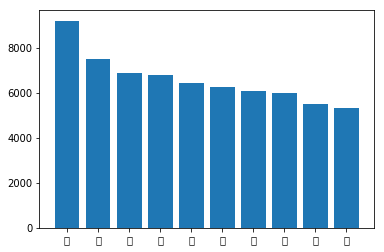

['の', '。', 'て', '、', 'は', 'に', 'を', 'だ', 'と', 'が']


In [15]:
neko_top_10 = neko_frequency.most_common()[:10]
words = [tup[0] for tup in neko_top_10]
freqs = [tup[1] for tup in neko_top_10]

plt.bar(words, freqs)
plt.show()
print(words)

## 37. 「猫」と共起頻度の高い上位10語
文章単位での共起を確認<br>
n-window以内の共起等も考えられる

In [16]:
co_occurs = []
for sentence_morphs in neko_morphs:
    neko_exists = False
    temporaly_saved_surfaces = []
    
    for morph in sentence_morphs:
        if morph['surface'] == "猫":
            neko_exists = True
            continue
        temporaly_saved_surfaces.append(morph['surface'])
        
    if neko_exists:
        co_occurs += temporaly_saved_surfaces

with_neko_top_10 = collections.Counter(co_occurs).most_common()[:10]

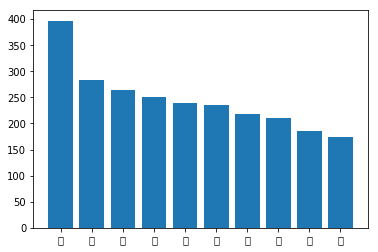

['の', 'は', '、', 'に', 'を', 'て', '。', 'と', 'が', 'で']


In [17]:
words = [tup[0] for tup in with_neko_top_10]
freqs = [tup[1] for tup in with_neko_top_10]
plt.bar(words, freqs)
plt.show()
print(words)

## 38. ヒストグラム

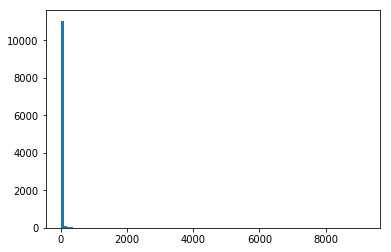

In [18]:
words = list(neko_frequency.keys())
freqs = list(neko_frequency.values())
plt.hist(freqs, bins=100)
plt.show()

## 39. Zipfの法則

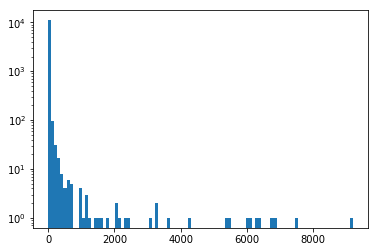

In [19]:
words = list(neko_frequency.keys())
freqs = list(neko_frequency.values())
plt.hist(freqs, bins=100, log=True)
plt.show()